In [1]:
# Final_Samples
import pandas as pd
import numpy as np
import json
import random
usable_samples_ADNI = json.load(open('./usable_samples_ADNI.json'))
PRS_orig_feature_matrix = np.load('./PRS_feature_matrix.npy').astype(np.float32)
PRS_orig_feature_matrix = (PRS_orig_feature_matrix - PRS_orig_feature_matrix.mean(0))/PRS_orig_feature_matrix.std(0)
print( PRS_orig_feature_matrix.shape[1], len(usable_samples_ADNI) )
num_features=PRS_orig_feature_matrix.shape[1]
print(num_features)

35 1816
35


In [2]:
num_features = 35

In [3]:
PRS_feature_matrix = PRS_orig_feature_matrix
PRS_feature_matrix = PRS_feature_matrix[:, :num_features]
print(PRS_feature_matrix.shape)

(1816, 35)


In [4]:
df = pd.read_csv('./COVAR_FILE_bigger_dataset.txt', ' ') 
print("shape",df.shape)
print( df[['AGE', 'PTGENDER']].shape, df[['AGE', 'PTGENDER']].dropna().shape )
print( df.head() ) # PC - Principal Component

shape (1817, 14)
(1817, 2) (1817, 2)
                FID               IID       PC1       PC2       PC3       PC4  \
0  ADNI3_036_S_6231  ADNI3_036_S_6231 -0.006724 -0.010617  0.001596 -0.000460   
1  ADNI3_006_S_6277  ADNI3_006_S_6277 -0.010432 -0.010269  0.012757  0.006921   
2  ADNI3_129_S_6146  ADNI3_129_S_6146 -0.004919 -0.011656 -0.035521  0.064641   
3  ADNI3_033_S_6352  ADNI3_033_S_6352 -0.014069 -0.010279  0.020014  0.053023   
4  ADNI3_027_S_6183  ADNI3_027_S_6183 -0.010766 -0.012370 -0.010960  0.029830   

        PC5       PC6       PC7       PC8       PC9      PC10  PTGENDER   AGE  
0 -0.013131 -0.005855 -0.005142 -0.009063 -0.001739 -0.012863         1  69.1  
1 -0.014958 -0.005860 -0.027775 -0.009632  0.054966  0.087390         1  70.7  
2  0.012094  0.003860  0.035955  0.006561  0.019736 -0.023304         1  65.5  
3  0.023691  0.000247 -0.002273 -0.030627 -0.053461  0.049984         0  71.4  
4 -0.019520 -0.001955  0.023844  0.079138  0.002207  0.008892         0  65.

C:\Users\HP\.conda\envs\ad_venv_2\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df['AGE'].value_counts()

75.8    17
70.8    15
80.4    15
71.4    14
70.9    14
        ..
91.4     1
89.2     1
86.6     1
54.4     1
58.0     1
Name: AGE, Length: 328, dtype: int64

# The value counts show that there is not age with 0 value in the covar file

In [6]:
print( len( usable_samples_ADNI ) )
print( type( usable_samples_ADNI ) )

rev_dict = {}
  
for key, value in usable_samples_ADNI.items():
    rev_dict.setdefault(value, set()).add(key)
      
result = [key for key, values in rev_dict.items()
                              if len(values) > 1]
  
# printing result
print( len( rev_dict ) )
print("duplicate values", str(result))

1816
<class 'dict'>
1816
duplicate values []


* The cell below prints out the mismatched IID of both covar file and usable samples ADNI

In [7]:
print( df['IID'].nunique() )
# print( usable_samples_ADNI.keys() )

notFoundIndex = []
for sample in usable_samples_ADNI:
    if len( df[df['IID'] == sample].index ) == 0 :
        notFoundIndex.append(sample)
#     print(df[df['IID'] == sample].index[0])
#     foundIndex.append( df[df['IID'] == sample].index[0] )
#     if sample in df['IID']:
#         print("exists")
#     else:
#         print("doesn't exist")
print( len( notFoundIndex ) )

notFoundInSamples = []
for item in df['IID'] :
    if item not in usable_samples_ADNI.keys():
        notFoundInSamples.append(item)
print( len(notFoundInSamples ) )

notFoundInSamples.sort()
notFoundIndex.sort()

for i in range( len(notFoundIndex ) ):
    print(notFoundIndex[i], notFoundInSamples[i])

1817
234
235
159_021_S_2124 100_094_S_2201
163_019_S_4367 101_068_S_2171
168_094_S_2201 102_114_S_0166
177_116_S_4010 104_041_S_4004
185_941_S_2060 105_033_S_0922
196_037_S_0454 105_067_S_2301
198_003_S_2374 105_127_S_4500
210_036_S_0673 107_129_S_4220
222_123_S_2055 108_032_S_0677
222_141_S_0915 10_073_S_2264
239_153_S_4372 110_941_S_2060
249_094_S_4089 111_019_S_4293
253_073_S_2225 112_098_S_4215
256_116_S_4199 113_073_S_4393
25_072_S_2164 114_019_S_4367
263_029_S_4307 116_128_S_2130
263_072_S_1380 117_033_S_4505
268_068_S_4217 118_073_S_4312
268_141_S_1004 119_068_S_4174
26_052_S_1346 11_094_S_2216
26_128_S_0522 120_114_S_1106
270_067_S_2301 121_072_S_2027
276_073_S_4393 122_011_S_2274
289_023_S_0126 124_029_S_4307
290_098_S_4215 126_123_S_0072
293_002_S_4229 127_009_S_2208
296_029_S_0914 128_130_S_0232
298_021_S_0178 129_012_S_4012
300_128_S_2130 12_021_S_0337
305_032_S_0677 130_014_S_0519
309_036_S_2380 131_067_S_4054
313_068_S_4340 132_130_S_2391
313_099_S_4022 133_027_S_0835
315

NO DUPLICATE VALUE IN usable_samples_ADNI

NO DUPLICATE VALUE IN IID of covar_file_bigger_dataset

In [8]:
import numpy as np
import pandas as pd
AGE_GENDER_PTID_map = pd.read_csv('../larger_dataset/ADNIMERGE.csv')[['PTID', 'PTGENDER', 'AGE']]
AGE_GENDER_PTID_map['PTGENDER'] = (AGE_GENDER_PTID_map['PTGENDER'] == 'Female').astype(int)
AGE_GENDER_PTID_map

C:\Users\HP\AppData\Local\Temp\ipykernel_16140\2969402204.py:3: DtypeWarning: Columns (18,19,20,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  AGE_GENDER_PTID_map = pd.read_csv('../larger_dataset/ADNIMERGE.csv')[['PTID', 'PTGENDER', 'AGE']]


,PTID,PTGENDER,AGE
0,011_S_0002,0,74.3
1,011_S_0003,0,81.3
2,011_S_0003,0,81.3
3,011_S_0003,0,81.3
4,011_S_0003,0,81.3
...,...,...,...
15117,021_S_6896,0,64.8
15118,035_S_4464,0,70.4
15119,041_S_5097,0,67.5
15120,027_S_5288,1,81.9


In [9]:
# COVAR_FILE = df.to_numpy()[:, 2:].astype(np.float32)
cnt = 0
print("shape1",PRS_feature_matrix.shape)
FEATURE_MATRIX = np.concatenate([PRS_feature_matrix, np.zeros([PRS_feature_matrix.shape[0], 12])], 1).astype(np.float32)
print("shape2",FEATURE_MATRIX.shape)
for sample in usable_samples_ADNI:
    covar = df[df['IID'] == sample].to_numpy()[:, 2:].astype(np.float32) # taking from the PCs, skipping the first two columns of IID, FID
#     print(covar)
    #     if cnt < 2:
#         print(covar)
#     print(covar.shape)
    if covar.shape[0] != 1:
#         print(sample)
        cnt += 1
        continue
    FEATURE_MATRIX[usable_samples_ADNI[sample],num_features:] = covar
# cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]
# print("Feature Matrix")
# print(FEATURE_MATRIX[0])
print(covar[0])
print("samples: ", usable_samples_ADNI[sample])
# FEATURE_MATRIX[usable_samples_ADNI[sample], num_features:] = covar # naeem's modification
print("Feature Matrix")
print(FEATURE_MATRIX[:2])
# cnt/FEATURE_MATRIX.shape[0], FEATURE_MATRIX[:2], PRS_feature_matrix[:2]

shape1 (1816, 35)
shape2 (1816, 47)
[ 7.42901e-02 -1.11187e-02  2.98971e-02 -4.29416e-03  4.33895e-02
  1.65844e-02  2.19540e-02  5.88536e-03 -3.96630e-03 -1.28506e-02
  0.00000e+00  8.04000e+01]
samples:  1815
Feature Matrix
[[ 6.0254073e-01  3.8611200e-01 -5.8913165e-01 -5.6206602e-01
   1.3769143e+00  1.1957877e+00  6.7549521e-01 -8.1201518e-01
   1.4735116e+00  1.5833879e+00  1.1038882e+00  4.7303710e-02
  -2.5817478e-01  2.0768111e+00  3.4892298e-02  1.5471818e+00
   2.1130602e-01 -7.8878814e-01  1.1477689e+00 -7.1390218e-01
   6.5592009e-01  3.6035888e-02 -1.0208811e+00  4.2786098e-01
   4.4062281e-01  4.1337675e-01  1.9010180e-01 -2.0883363e-01
   6.4279914e-01  8.8049096e-01 -1.5337672e+00 -5.0156575e-01
  -4.5751646e-02  8.8257521e-01 -3.8061208e-01 -6.7239902e-03
  -1.0617300e-02  1.5955199e-03 -4.6042900e-04 -1.3131300e-02
  -5.8546802e-03 -5.1415302e-03 -9.0632401e-03 -1.7389200e-03
  -1.2863100e-02  1.0000000e+00  6.9099998e+01]
 [ 3.2023571e-02 -7.2182208e-01  5.6008160e-

In [10]:
last_idx = FEATURE_MATRIX.shape[1]
# feature_indices_to_consider = [0, 1, 2, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15] +  [last_idx - 1, last_idx - 2]
feature_indices_to_consider = list(range(num_features)) + [last_idx - 1, last_idx - 2]
# feature_indices_to_consider = list(range(23)) + [24, 27, last_idx - 1, last_idx - 2]
# feature_indices_to_consider = list(range(23)) + [24, 27, last_idx - 1, last_idx - 2]
# feature_indices_to_consider = list(range(num_features)) 
print(feature_indices_to_consider)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 46, 45]


In [11]:
import json
import numpy as np
import random

In [12]:
Final_Samples = json.load(open('Final_Samples_4yrs.json', 'r')) 
positive_samples = 0
negative_samples = 0
for x in Final_Samples:
    if x[1] == 1 :
        positive_samples += 1
    else :
        negative_samples += 1
        
print(len(Final_Samples))
print(positive_samples)
print(negative_samples)

1158
654
504


In [13]:
print(len(Final_Samples))
positive_samples = Final_Samples[:654] # Final_Samples[654:]
positive_samples = Final_Samples[:654]
negative_samples = Final_Samples[654:]
print(len(positive_samples))
print(len(negative_samples))
len_pos = len(positive_samples)
len_neg = len(negative_samples)
min_len = min(len_pos, len_neg)
random_seed = None
if random_seed is not None: 
    random.seed(random_seed * 2)
random.shuffle(positive_samples)
random.shuffle(negative_samples)
# Final_Samples = positive_samples[:500] + negative_samples[:500]
Final_Samples = positive_samples[:min_len] + negative_samples[:min_len]
print(len([x[1] for x in Final_Samples if x[1] == 1]), len([x[1] for x in Final_Samples if x[1] == 0]))
Final_Samples = np.array(Final_Samples)
Final_Samples.shape
# Final_Samples.reshape(10, -1, 2).shape

1158
654
504
504 504


(1008, 2)

In [14]:
import json
import pandas as pd
GWAS_ID = 'ieu-b-25'
usable_samples_ADNI = pd.read_csv(f'./PRSice_output/{GWAS_ID}/{GWAS_ID}.best', ' ')['IID'].to_numpy().tolist()
usable_samples_ADNI = {'_'.join(sample.split('_')[1:]):idx for idx,sample in enumerate(usable_samples_ADNI)}
# usable_samples_ADNI = {sample:idx for idx,sample in enumerate(usable_samples_ADNI)}
print(len( usable_samples_ADNI ))

1816


C:\Users\HP\.conda\envs\ad_venv_2\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
import torch
from torch.utils import data

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

import shap
from copy import deepcopy

print(FEATURE_MATRIX[0])
# print(len(Final_Samples))
usable_indices = [( usable_samples_ADNI[Final_Samples[i][0]] if ( Final_Samples[i][0] in usable_samples_ADNI.keys() ) else None ) for i in range(len(Final_Samples))]
# print(len(usable_indices))
# print(usable_indices)
print(feature_indices_to_consider)
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
print("Shape of usable features : ", usable_features.shape)
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])
print("Length of usable labels : ", len(usable_labels))
usable_features = torch.autograd.Variable(torch.from_numpy(usable_features)).to(DEVICE).float()

print("Usable Features : ", usable_features[0])

C:\Users\HP\.conda\envs\ad_venv_2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[ 6.0254073e-01  3.8611200e-01 -5.8913165e-01 -5.6206602e-01
  1.3769143e+00  1.1957877e+00  6.7549521e-01 -8.1201518e-01
  1.4735116e+00  1.5833879e+00  1.1038882e+00  4.7303710e-02
 -2.5817478e-01  2.0768111e+00  3.4892298e-02  1.5471818e+00
  2.1130602e-01 -7.8878814e-01  1.1477689e+00 -7.1390218e-01
  6.5592009e-01  3.6035888e-02 -1.0208811e+00  4.2786098e-01
  4.4062281e-01  4.1337675e-01  1.9010180e-01 -2.0883363e-01
  6.4279914e-01  8.8049096e-01 -1.5337672e+00 -5.0156575e-01
 -4.5751646e-02  8.8257521e-01 -3.8061208e-01 -6.7239902e-03
 -1.0617300e-02  1.5955199e-03 -4.6042900e-04 -1.3131300e-02
 -5.8546802e-03 -5.1415302e-03 -9.0632401e-03 -1.7389200e-03
 -1.2863100e-02  1.0000000e+00  6.9099998e+01]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 46, 45]
Shape of usable features :  (1008, 37)
Length of usable labels :  1008
Usable Features :  tensor([ 0.9037,  0.9120, -1.2539,  1.2701, -0.4980, 

In [16]:
# feature_indices_to_consider = list(range(0, num_features)) #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 22]

usable_indices = [usable_samples_ADNI[Final_Samples[i][0]] for i in range(len(Final_Samples))]
usable_features = FEATURE_MATRIX[usable_indices][:, feature_indices_to_consider]
usable_labels = np.array([float(Final_Samples[i][1]) for i in range(len(Final_Samples))])

print(usable_features.shape)
print( len( usable_labels ) )
print(type(usable_features))

(1008, 37)
1008
<class 'numpy.ndarray'>


In [17]:
import json
# in place of json straight took it hardcoded

all_traits = json.load(open('traits_map.json', 'r'))
# print(all_traits)
GWAS_IDS = list(all_traits)
# print(GWAS_IDS)
traits = [all_traits[x] for x in all_traits]
print(len(traits))

35


# Feature Analysis

(1008, 38)
35
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 46, 45, 35]
         0         1         2         3         4         5         6   \
0  0.903660  0.912048 -1.253871  1.270148 -0.497992  1.681909 -0.180305   
1 -0.532490 -0.312643  1.666165 -0.261126 -2.270244 -0.858339 -1.260206   
2  0.590052  0.734882  0.144445  0.198777 -0.562625 -0.928095 -0.916218   
3 -1.305919 -0.835075 -0.489801 -1.039889 -0.066257  1.366336 -1.181942   
4 -0.278340  0.598193  0.317768 -0.121613  0.499716  0.296452 -0.382195   

         7         8         9   ...        28        29        30        31  \
0  0.071504  0.272273 -0.570381  ... -0.222598  2.187735  0.592474  1.078475   
1  1.531173  0.055451 -0.812556  ...  0.092694 -0.827596  0.785791 -0.079983   
2 -0.627963  1.751986 -0.196626  ... -0.998954 -0.199754 -0.782435  1.378963   
3 -0.750764  1.994656 -0.593526  ...  1.103186 -0.105400  2.316528  0.54

<AxesSubplot:>

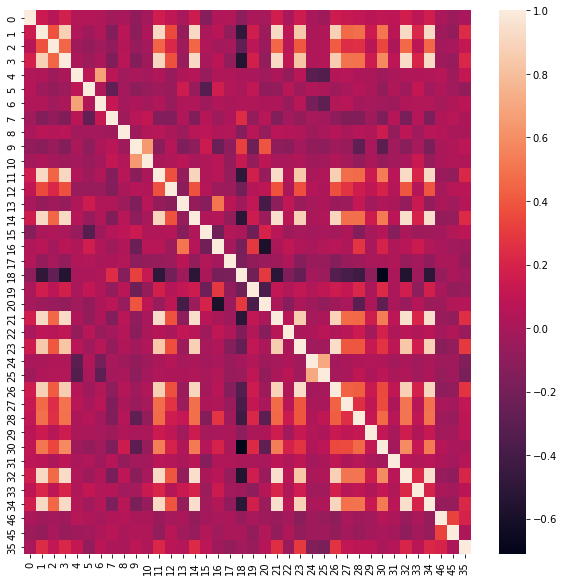

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

total_features = np.c_[ usable_features, usable_labels ]
print(total_features.shape)
print(num_features)
# column_list = list(range(num_features)) + [last_idx - 1, last_idx - 2, num_features ] 
column_list = feature_indices_to_consider + [num_features]
print( column_list )

df = pd.DataFrame(total_features, columns = column_list )
print( df.head() )

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
corr = df.corr()
sns.heatmap(corr)

In [19]:
print(corr)

          0         1         2         3         4         5         6   \
0   1.000000  0.141751  0.060590  0.181219  0.038616  0.045792  0.024468   
1   0.141751  1.000000  0.381217  0.877838  0.036322 -0.030318  0.027641   
2   0.060590  0.381217  1.000000  0.448232 -0.040381 -0.076090 -0.025379   
3   0.181219  0.877838  0.448232  1.000000  0.008420 -0.048874  0.009007   
4   0.038616  0.036322 -0.040381  0.008420  1.000000  0.079567  0.677176   
5   0.045792 -0.030318 -0.076090 -0.048874  0.079567  1.000000  0.032924   
6   0.024468  0.027641 -0.025379  0.009007  0.677176  0.032924  1.000000   
7  -0.026465 -0.137973 -0.083839 -0.153913  0.076351 -0.273371  0.118439   
8  -0.000699  0.067921  0.050142  0.068833 -0.026691 -0.017130 -0.018412   
9  -0.087398 -0.116371 -0.063002 -0.140275  0.004409 -0.099806  0.018655   
10 -0.015554  0.021280 -0.018600 -0.033395 -0.019526 -0.059199 -0.013961   
11  0.157874  0.914788  0.443492  0.908548  0.033180 -0.033624  0.025912   
12  0.096741

In [20]:
print(corr.shape)
features_selected = []
# print(corr)
# print(usable_features)
print(num_features)
# print(column_list)
for i in column_list: 
#     print(corr[i][num_features])
#     print(i)
    if (corr[i][num_features] > 0.1 ) and i != num_features :
       # print(corr[i][num_features])
        if i < num_features :
            print(i, traits[i], corr[i][num_features])
        else:
            print(i, corr[i][num_features])
        features_selected.append(i)
print(features_selected)

(38, 38)
35
1 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No 0.23319245477597259
2 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year 0.10643128717160187
3 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year 0.21150526853730012
4 Total cholesterol 0.10803119465875663
11 Hearing difficulty/problems: Yes 0.21981989426917592
14 Hearing difficulty/problems with background noise 0.2278497222523498
21 Types of physical activity in last 4 weeks: Strenuous sports 0.24521174077152394
23 Loneliness, isolation 0.29453203927527616
26 Mood swings 0.2695235990304714
32 Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.21099550405509884
34 Non-cancer illness code, self-reported: hypertension 0.2232030645706439
46 0.19341965463469896
[1, 2, 3, 4, 11, 14, 21, 23, 26, 32, 34, 46]


# For 6 years data

1 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No 0.20953815028723816

3 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year 0.19550254145659604

9 systolic blood pressure 0.13136112452843546

10 diastolic blood pressure 0.12331358008367997

11 Hearing difficulty/problems: Yes 0.2043427554414797

14 Hearing difficulty/problems with background noise 0.21204661783800505

21 Types of physical activity in last 4 weeks: Strenuous sports 0.2177339471469747

23 Loneliness, isolation 0.26826517643489145

26 Mood swings 0.2538914921054018

28 Non-cancer illness code, self-reported: stroke 0.11139490259273072

32 Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.18822760980334968

34 Non-cancer illness code, self-reported: hypertension 0.1952774419467026

46 Age 0.20476908743398434

[1, 3, 9, 10, 11, 14, 21, 23, 26, 28, 32, 34, 46]

# For 4 years data
1 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No 0.23319245477597259

2 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year 0.10643128717160187

3 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year 0.21150526853730012

4 Total cholesterol 0.10803119465875663

11 Hearing difficulty/problems: Yes 0.21981989426917592

14 Hearing difficulty/problems with background noise 0.2278497222523498

21 Types of physical activity in last 4 weeks: Strenuous sports 0.24521174077152394

23 Loneliness, isolation 0.29453203927527616

26 Mood swings 0.2695235990304714

32 Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.21099550405509884

34 Non-cancer illness code, self-reported: hypertension 0.2232030645706439

46 Age 0.19341965463469896

[1, 2, 3, 4, 11, 14, 21, 23, 26, 32, 34, 46]

# 6 years
[1, 3, 9, 10, 11, 14, 21, 23, 26, 28, 32, 34, 46]

# 4 years
[1, 2, 3, 4, 11, 14, 21, 23, 26, 32, 34, 46]

In [21]:
print(num_features)
for i in range(num_features):
    for j in range(i + 1, num_features):
        if ( corr[i][j] > 0.9 ) and (i != j) :
            print(i, j, traits[i], traits[j], corr[i][j])
            if ( i in features_selected ) and ( j in features_selected ) :
                features_selected.remove(i)
print(features_selected)

35
1 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems: Yes 0.9147876892119942
1 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems with background noise 0.9158492919281928
1 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Types of physical activity in last 4 weeks: Strenuous sports 0.9191770131238025
1 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9191916604503252
1 34 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypertension 0.9191877367446427
3 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems: Yes 0.908547743156

# For 6 years Data
1 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems: Yes 0.9284715636345631

1 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems with background noise 0.9297188173084894

1 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Types of physical activity in last 4 weeks: Strenuous sports 0.9297324727788002

1 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.930182724394133

1 34 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypertension 0.9299910860980392

3 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems: Yes 0.9184726201588524

3 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems with background noise 0.9296195348566246

3 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Types of physical activity in last 4 weeks: Strenuous sports 0.9333280494678614

3 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9366443200793778

3 34 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Non-cancer illness code, self-reported: hypertension 0.9353503095919462

11 14 Hearing difficulty/problems: Yes Hearing difficulty/problems with background noise 0.913064371980317

11 21 Hearing difficulty/problems: Yes Types of physical activity in last 4 weeks: Strenuous sports 0.9370115122954104.

11 32 Hearing difficulty/problems: Yes Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9331949982856079

11 34 Hearing difficulty/problems: Yes Non-cancer illness code, self-reported: hypertension 0.9300580335363602

14 21 Hearing difficulty/problems with background noise Types of physical activity in last 4 weeks: Strenuous sports 0.9515055032977894

14 26 Hearing difficulty/problems with background noise Mood swings 0.9139895282633408

14 32 Hearing difficulty/problems with background noise Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9523903322224636

14 34 Hearing difficulty/problems with background noise Non-cancer illness code, self-reported: hypertension 0.9519350008614197

21 32 Types of physical activity in last 4 weeks: Strenuous sports Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9560649095047308

21 34 Types of physical activity in last 4 weeks: Strenuous sports Non-cancer illness code, self-reported: hypertension 0.9472482370476791

23 26 Loneliness, isolation Mood swings 0.9474518369910158

26 34 Mood swings Non-cancer illness code, self-reported: hypertension 0.909437789567519

32 34 Non-cancer illness code, self-reported: hypothyroidism/myxoedema Non-cancer illness code, self-reported: hypertension 0.9499556098473917

[9, 10, 28, 34, 46]

# For 4 years

1 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems: Yes 0.9147876892119942

1 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Hearing difficulty/problems with background noise 0.9158492919281928

1 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Types of physical activity in last 4 weeks: Strenuous sports 0.9191770131238025

1 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9191916604503252

1 34 Ever had known person concerned about, or recommend reduction of, alcohol consumption: No Non-cancer illness code, self-reported: hypertension 0.9191877367446427

3 11 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems: Yes 0.9085477431566377

3 14 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Hearing difficulty/problems with background noise 0.9187355395502976

3 21 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Types of physical activity in last 4 weeks: Strenuous sports 0.9259698329647723

3 32 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9266118954278297

3 34 Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year Non-cancer illness code, self-reported: hypertension 0.924386310766261

11 21 Hearing difficulty/problems: Yes Types of physical activity in last 4 weeks: Strenuous sports 0.9268842511289856

11 32 Hearing difficulty/problems: Yes Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9209767515369269

11 34 Hearing difficulty/problems: Yes Non-cancer illness code, self-reported: hypertension 0.9176740497550955

14 21 Hearing difficulty/problems with background noise Types of physical activity in last 4 weeks: Strenuous sports 0.9425321947109231

14 26 Hearing difficulty/problems with background noise Mood swings 0.903440843801307

14 32 Hearing difficulty/problems with background noise Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9442851472919036

14 34 Hearing difficulty/problems with background noise Non-cancer illness code, self-reported: hypertension 0.9455607074443202

21 32 Types of physical activity in last 4 weeks: Strenuous sports Non-cancer illness code, self-reported: hypothyroidism/myxoedema 0.9488809338857472

21 34 Types of physical activity in last 4 weeks: Strenuous sports Non-cancer illness code, self-reported: hypertension 0.9420345060227503

23 26 Loneliness, isolation Mood swings 0.9398081473947429

26 34 Mood swings Non-cancer illness code, self-reported: hypertension 0.9021932566898926

32 34 Non-cancer illness code, self-reported: hypothyroidism/myxoedema Non-cancer illness code, self-reported: hypertension 0.9420664068442942

[2, 4, 34, 46]

# 6 years
[9, 10, 28, 34, 46]

# 4 years
[2, 4, 34, 46]

Non-cancer illness code, self-reported: type 2 diabetes


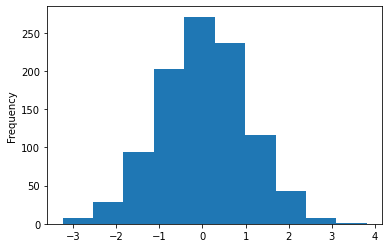

Ever had known person concerned about, or recommend reduction of, alcohol consumption: No


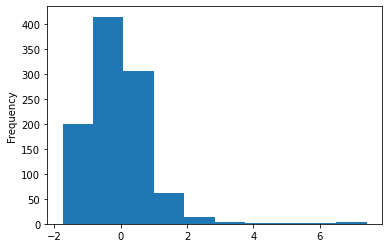

Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, but not in the last year


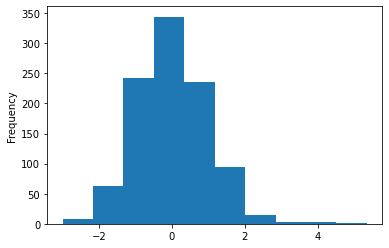

Ever had known person concerned about, or recommend reduction of, alcohol consumption: Yes, during the last year


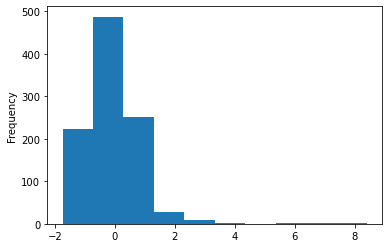

Total cholesterol


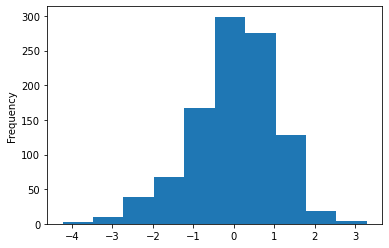

HDL cholesterol


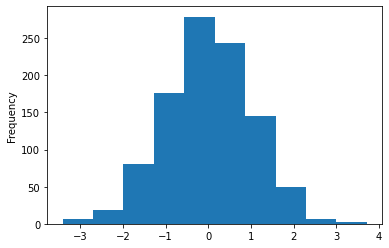

LDL cholesterol


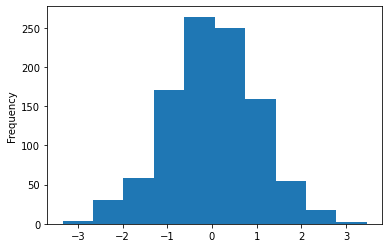

triglycerides


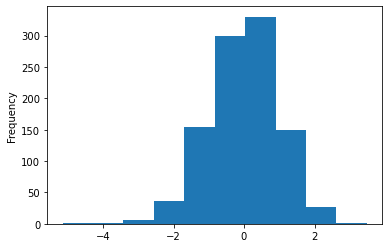

Cigarettes per Day


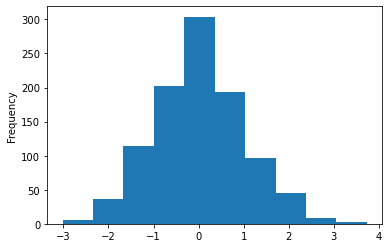

systolic blood pressure


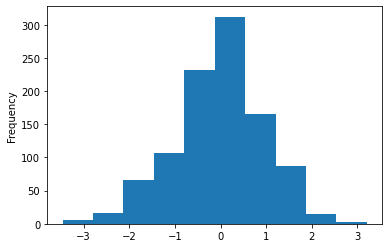

diastolic blood pressure


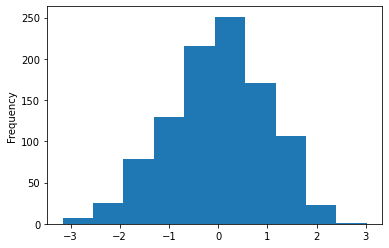

Hearing difficulty/problems: Yes


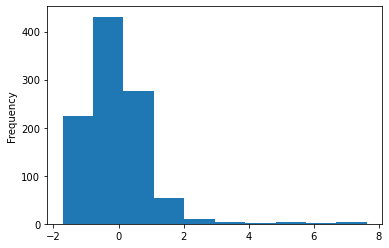

Non-cancer illness code, self-reported: depression


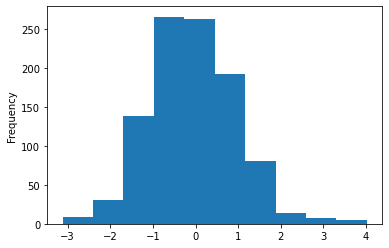

Non-oily fish intake


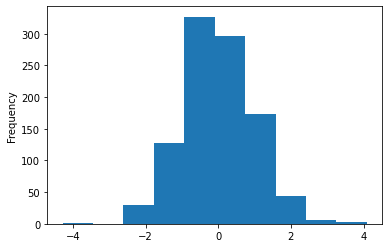

Hearing difficulty/problems with background noise


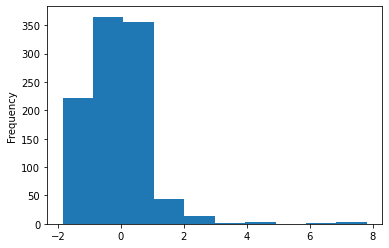

Body mass index (BMI)


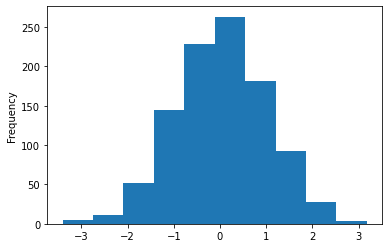

Oily fish intake


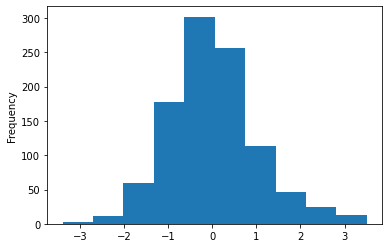

Sleeplessness / insomnia


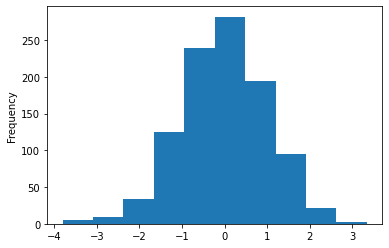

Sleep duration


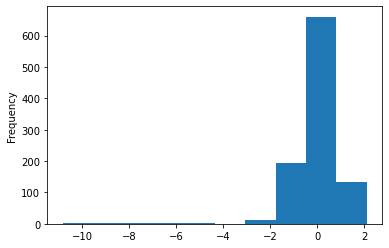

Age completed full time education


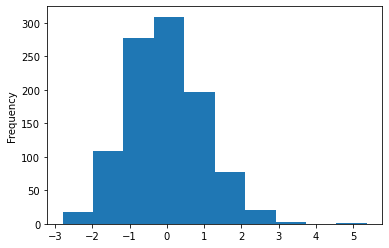

Processed meat intake


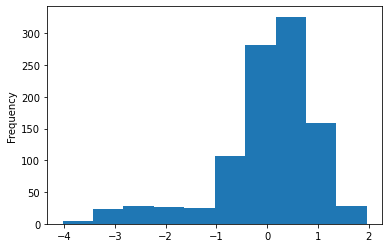

Types of physical activity in last 4 weeks: Strenuous sports


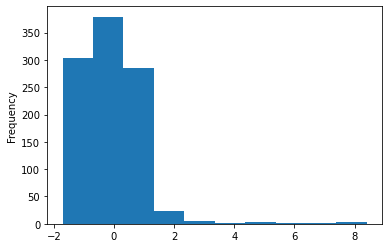

Other meat intake


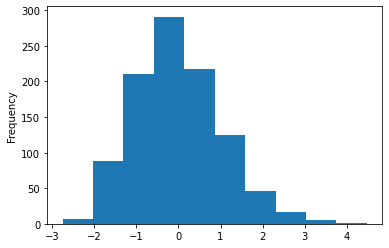

Loneliness, isolation


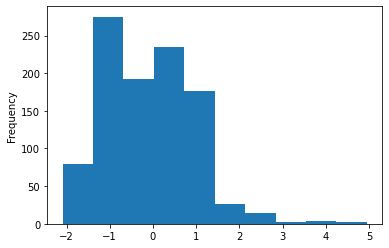

Illnesses of father: Alzheimer's disease/dementia


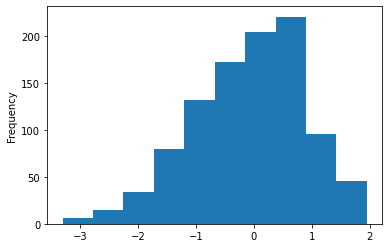

Illnesses of mother: Alzheimer's disease/dementia


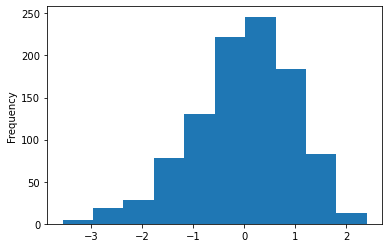

Mood swings


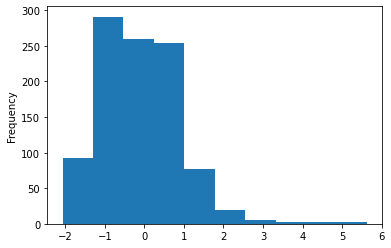

Non-cancer illness code, self-reported: anxiety/panic attacks


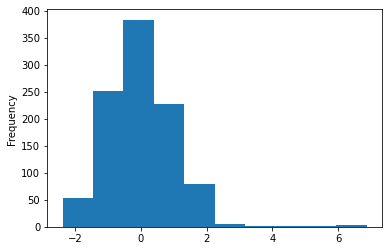

Non-cancer illness code, self-reported: stroke


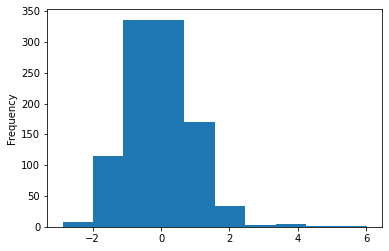

Non-cancer illness code, self-reported: head injury


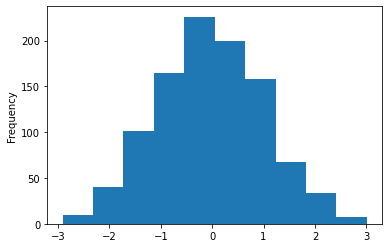

Alcohol intake frequency


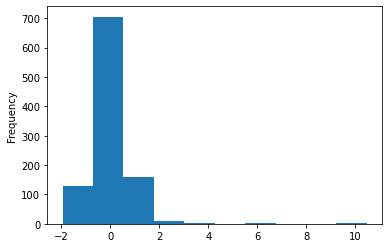

Diagnoses - secondary ICD10: E66.9 Obesity, unspecified


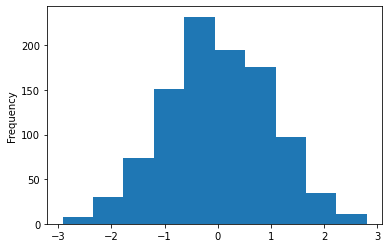

Non-cancer illness code, self-reported: hypothyroidism/myxoedema


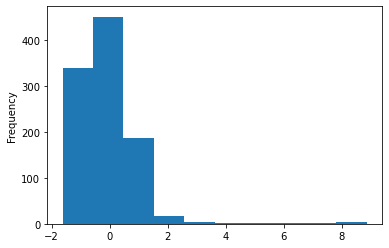

Non-cancer illness code, self-reported: hyperthyroidism/thyrotoxicosis


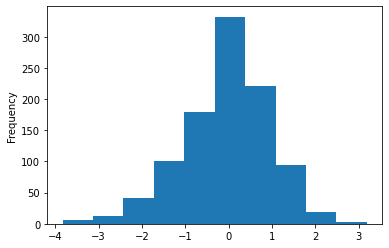

Non-cancer illness code, self-reported: hypertension


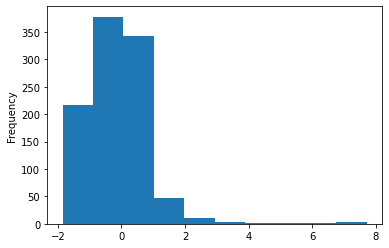

46


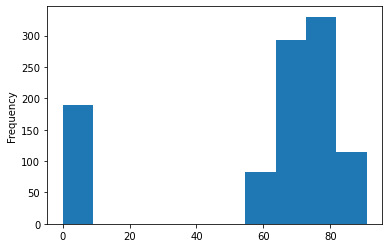

45


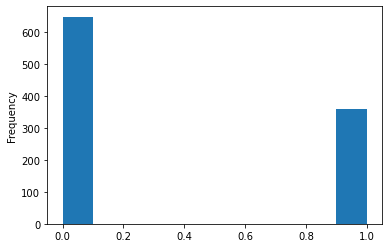

35


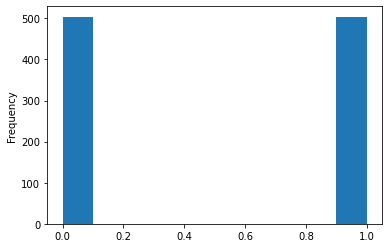

In [22]:
# print(df.head())
for i in column_list:
    if( i < len(traits) ):
        print(traits[i])
    else:
        print(i)
    df[i].plot(kind="hist")
    plt.show()

In [23]:
print(df[45].value_counts())

0.0    648
1.0    360
Name: 45, dtype: int64


In [24]:
# get df with only negative values for ADNI
df_negative = df[df[34] == 0]
print(df_negative.shape)
print(df_negative.head())

(0, 38)
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 46, 45, 35]
Index: []

[0 rows x 38 columns]


In [25]:
df_negative[45].value_counts()

Series([], Name: 45, dtype: int64)

In [26]:
# get df with only positive values for ADNI
df_positive = df[df[34] == 1]
print(df_positive.shape)
print(df_positive.head())

(0, 38)
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 46, 45, 35]
Index: []

[0 rows x 38 columns]


In [27]:
df_positive[45].value_counts()

Series([], Name: 45, dtype: int64)